<a href="https://colab.research.google.com/github/Anishya181/Customer-Transaction-Analysis/blob/main/Customer_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=12Nd1MI1kL9Ze8_G-qqUy0TUB0ffqlhX9', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
df.drop_duplicates().shape

(9994, 21)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest

def detect_outliers(dataframe,contamination):

    a=list(dataframe.select_dtypes(['int64']).columns)+list(dataframe.select_dtypes(['float64']).columns)
    model=IsolationForest(contamination=contamination)
    model.fit(dataframe[a])
    outliers = model.predict(dataframe[a]) ==-1
    return outliers

contamination=0.005
index=detect_outliers(df[['Sales','Quantity','Discount','Profit']],contamination)
lign,col=df[index].shape
print("Number of outliers: {}".format(lign))

Number of outliers: 50


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
print('Total number of orders: ',df['Order ID'].nunique())
print('Total number of products: ', df['Product ID'].nunique())
print('Total number of customers: ', df['Customer ID'].nunique())

Total number of orders:  5009
Total number of products:  1862
Total number of customers:  793


In [ ]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

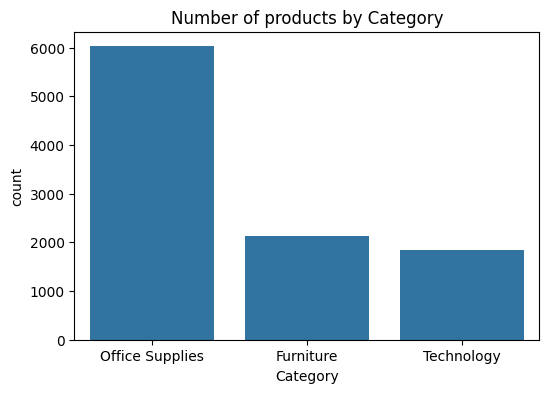

In [ ]:
plt.figure(figsize=(6,4))
df_sorted=df['Category'].value_counts().sort_values(ascending=False).index
sns.countplot(x='Category', data=df,order=df_sorted)
plt.title('Number of products by Category')
plt.show()

In [ ]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

(array([9.618e+03, 2.580e+02, 6.800e+01, 2.300e+01, 1.200e+01, 1.000e+00,
        1.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 1.13234580e+03, 2.26424760e+03, 3.39614940e+03,
        4.52805120e+03, 5.65995300e+03, 6.79185480e+03, 7.92375660e+03,
        9.05565840e+03, 1.01875602e+04, 1.13194620e+04, 1.24513638e+04,
        1.35832656e+04, 1.47151674e+04, 1.58470692e+04, 1.69789710e+04,
        1.81108728e+04, 1.92427746e+04, 2.03746764e+04, 2.15065782e+04,
        2.26384800e+04]),
 <BarContainer object of 20 artists>)

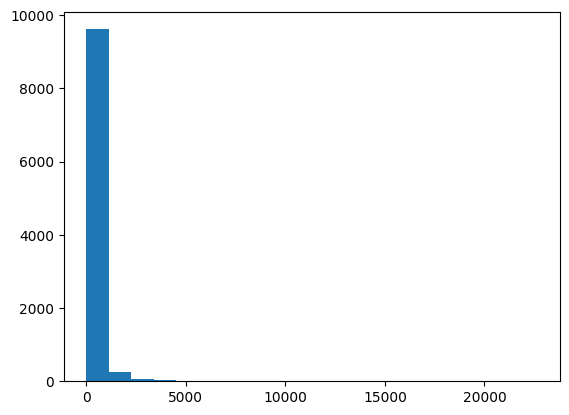

In [ ]:
plt.hist(df.Sales, bins=20)

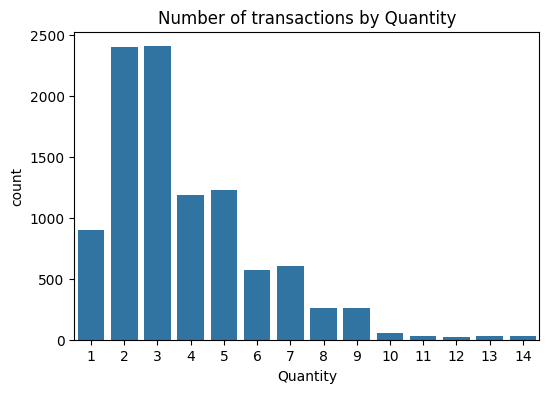

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Quantity',data=df)
plt.title('Number of transactions by Quantity')
plt.show()

In [ ]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

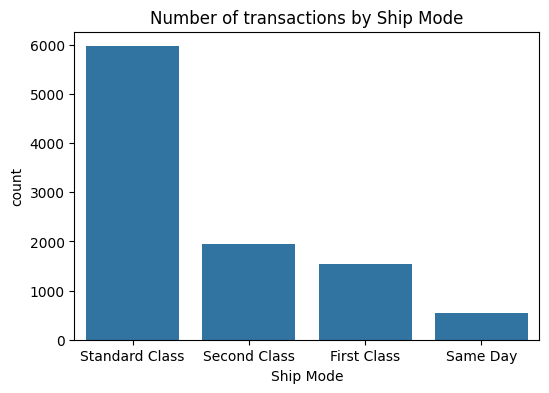

In [ ]:
plt.figure(figsize=(6,4))
sorted_data=df['Ship Mode'].value_counts().sort_values(ascending=False).index
sns.countplot(x='Ship Mode',data=df,order=sorted_data)
plt.title('Number of transactions by Ship Mode')
plt.show()

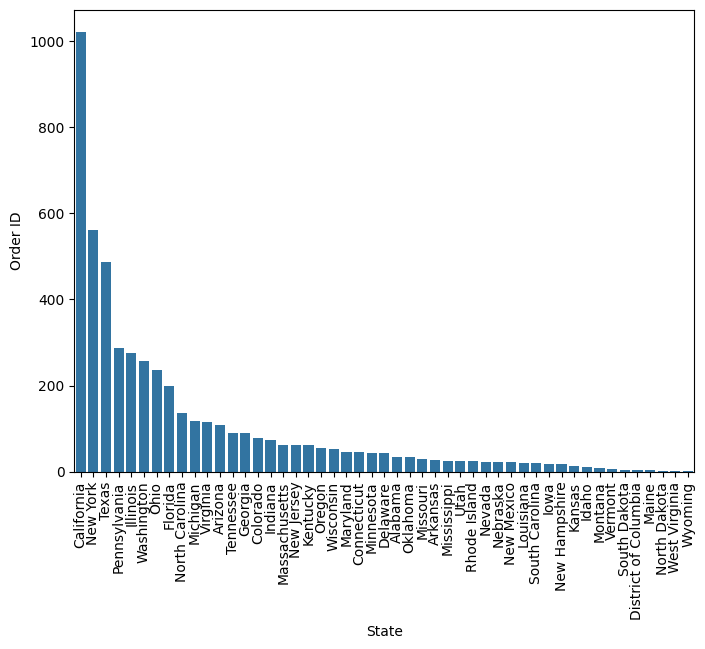

In [ ]:
plt.figure(figsize=(8,6))
dd=df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).reset_index()
sns.barplot(data=dd,x='State',y='Order ID')
plt.xticks(rotation=90)
plt.show()

In [ ]:
a=df.groupby('State')['Order ID'].nunique().sort_values(ascending=False).reset_index()
a

,State,Order ID
0,California,1021
1,New York,562
2,Texas,487
3,Pennsylvania,288
4,Illinois,276
5,Washington,256
6,Ohio,236
7,Florida,200
8,North Carolina,136
9,Michigan,117


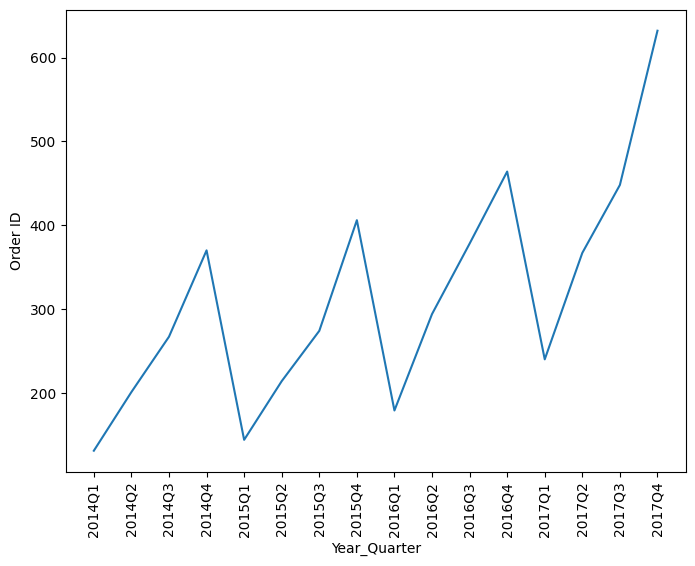

In [ ]:
plt.figure(figsize=(8,6))
df['Order Date']=pd.to_datetime(df['Order Date'])


df['Year_Quarter']=df['Order Date'].dt.to_period('Q')
df['Year_Quarter']=df['Year_Quarter'].astype(str)

orders_by_quarter_year=df.groupby(['Year_Quarter'])['Order ID'].nunique().reset_index()
sns.lineplot(data=orders_by_quarter_year, x='Year_Quarter', y='Order ID')
plt.xticks(rotation=90)
plt.show()

<ipython-input-22-8e0677d7d856>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year_Month']=pd.to_datetime(df['Year_Month'])


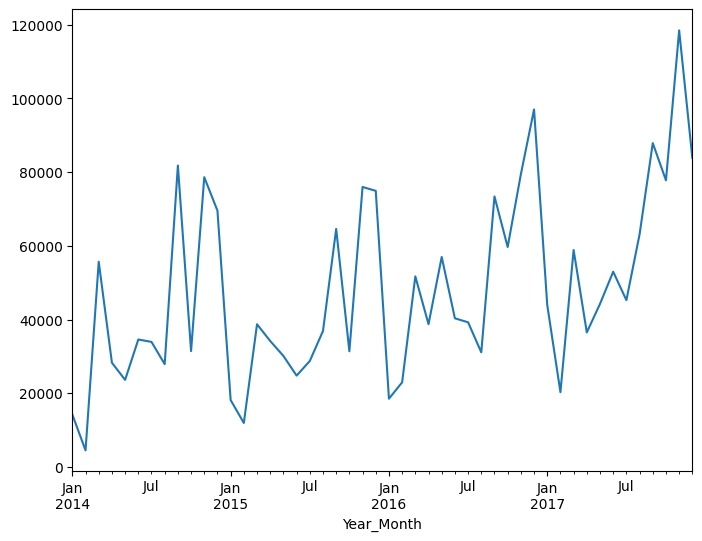

In [ ]:
plt.figure(figsize=(8,6))

df['Order Date']=pd.to_datetime(df['Order Date'])

df['Year_Month']=df['Order Date'].dt.strftime('%b %Y')
df['Year_Month']=pd.to_datetime(df['Year_Month'])
df_sorted=df.sort_values('Year_Month')

df.groupby(['Year_Month'])['Sales'].sum().plot(kind='line')
plt.show()

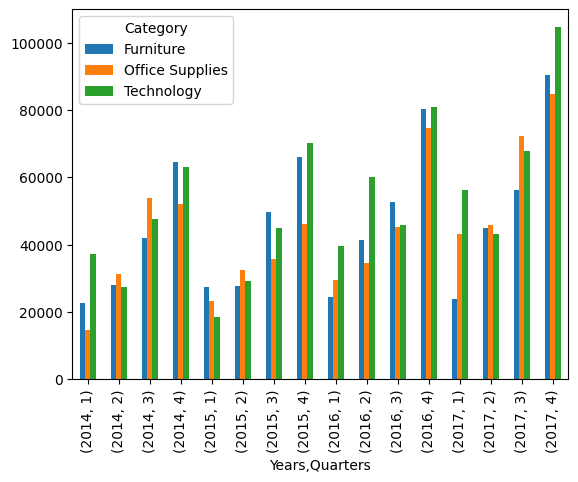

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Years'], df['Quarters']=df['Order Date'].dt.year, df['Order Date'].dt.quarter
df.groupby(['Years','Quarters','Category'])['Sales'].sum().unstack().plot(kind='bar')
plt.show()

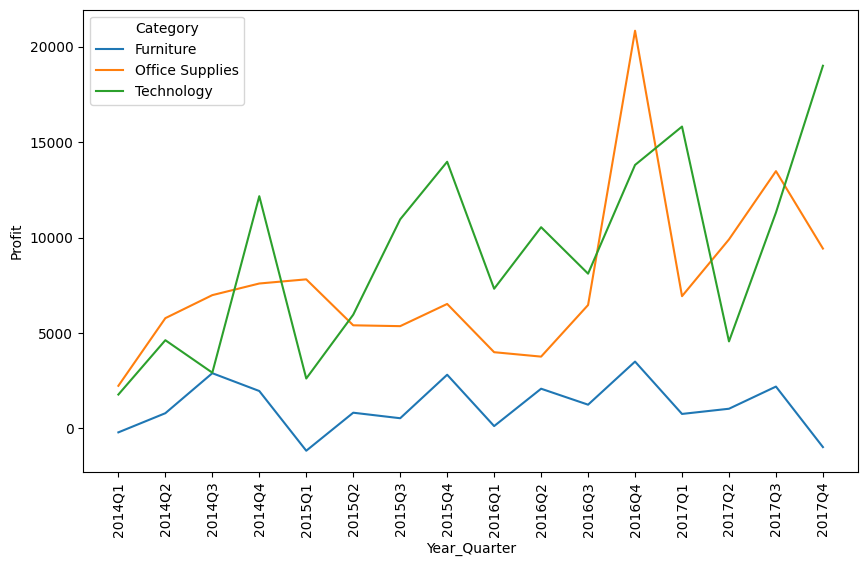

In [ ]:
plt.figure(figsize=(10,6))
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year_Quarter'] = df['Order Date'].dt.to_period('Q')
df['Year_Quarter'] = df['Year_Quarter'].astype(str)
profit_by_quarter_category = df.groupby(['Year_Quarter', 'Category'])['Profit'].sum().reset_index()

sns.lineplot(data=profit_by_quarter_category, x='Year_Quarter', y='Profit', hue='Category')
plt.xticks(rotation=90)
plt.show()


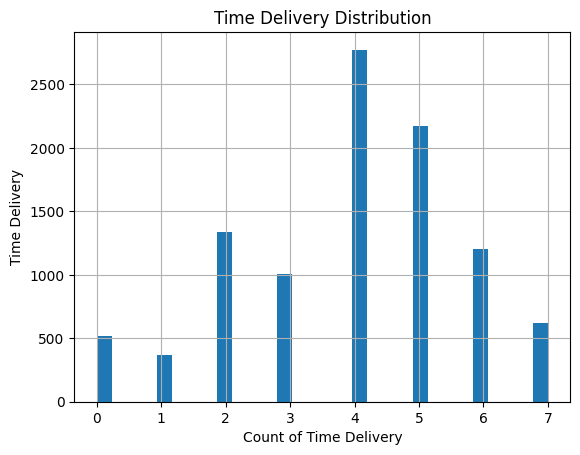

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Delivery Time'].hist(bins=30)
plt.title('Time Delivery Distribution')
plt.xlabel('Count of Time Delivery')
plt.ylabel('Time Delivery')
plt.show()

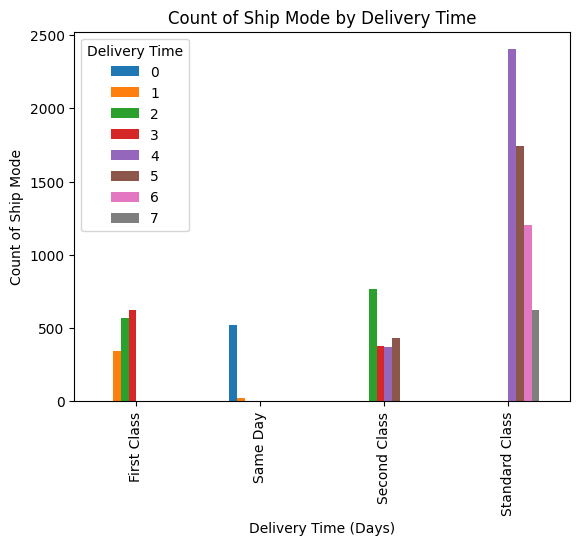

In [ ]:
ship_mode_delivery_time = df.groupby(['Ship Mode', 'Delivery Time'])['Order ID'].count().unstack()

ship_mode_delivery_time.plot(kind='bar', stacked=False)

plt.title('Count of Ship Mode by Delivery Time')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Count of Ship Mode')
plt.show()

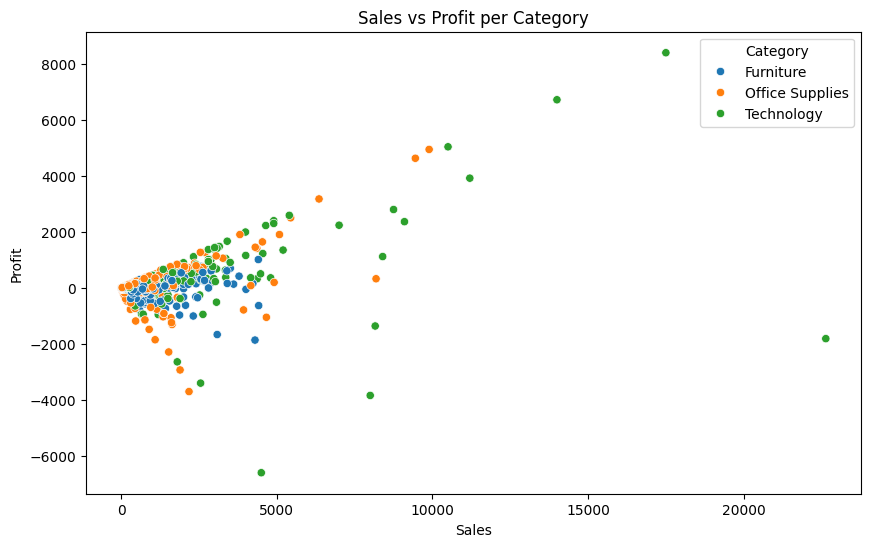

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit per Category')
plt.show()

In [ ]:
import pandas as pd
data=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ge3RLwOmmIZEjXaZiNVUnQ5J8ERadHl/gviz/tq?tqx=out:csv', encoding='ISO-8859-1')
data['Order Date']=pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)

In [ ]:
data = data[data.Sales<10000]

data = data.loc[~data.index.duplicated(keep='first')]
data = data.groupby(data.index).mean(numeric_only=True)
data=data.asfreq('W')

(array([137.,  20.,  15.,   6.,   4.,   3.,   3.,   1.,   2.,   2.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([1.0800000e+00, 1.5102350e+02, 3.0096700e+02, 4.5091050e+02,
        6.0085400e+02, 7.5079750e+02, 9.0074100e+02, 1.0506845e+03,
        1.2006280e+03, 1.3505715e+03, 1.5005150e+03, 1.6504585e+03,
        1.8004020e+03, 1.9503455e+03, 2.1002890e+03, 2.2502325e+03,
        2.4001760e+03, 2.5501195e+03, 2.7000630e+03, 2.8500065e+03,
        2.9999500e+03]),
 <BarContainer object of 20 artists>)

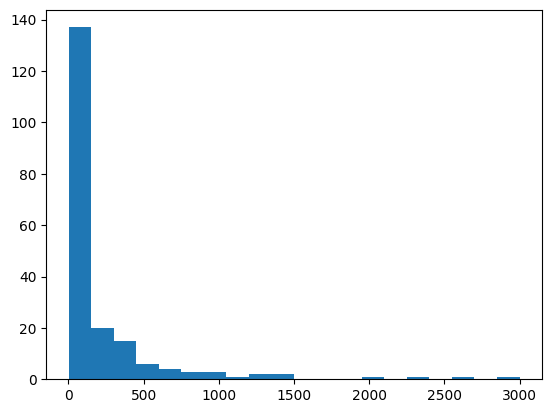

In [ ]:
plt.hist(data.Sales, bins=20)

In [ ]:
from pycaret.time_series import setup
s=setup(data=data, target='Sales', fh=10, fold_strategy='expanding', seasonal_period=52, fold=3,
        numeric_imputation_target='mean', numeric_imputation_exogenous='mean' )


,Description,Value
0,session_id,3875
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(208, 6)"
5,Transformed data shape,"(208, 6)"
6,Transformed train set shape,"(198, 6)"
7,Transformed test set shape,"(10, 6)"
8,Rows with missing values,5.3%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
from pycaret.time_series import compare_models
best_model = compare_models()
best_model

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.4290,0.3238,127.5939,186.2427,4.4253,0.7881,0.6910,0.8633
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.4344,0.3232,129.3342,185.8701,4.2175,0.8208,0.6750,0.8833
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.4669,0.3624,138.6006,208.3590,3.1914,0.8423,0.6699,0.9267
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.4902,0.4110,145.6231,236.5085,3.4697,0.7904,0.5204,0.5500
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.5635,0.4826,167.3338,277.6008,3.9049,0.8196,0.3653,0.4500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6575,0.6119,195.3429,351.4730,6.7387,0.9661,-0.0270,0.7967
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6682,0.4419,198.5412,254.0541,10.2937,1.0250,0.5027,0.9667
auto_arima,Auto ARIMA,0.7430,0.5837,220.9146,335.1914,14.7459,1.0500,0.0871,2.1367
arima,ARIMA,0.7436,0.5853,221.0936,336.1112,14.8293,1.0487,0.0823,3.7333
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7736,0.5811,229.7981,334.0139,4.9794,1.0427,0.1347,0.7767


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                   n_jobs=1)],
                    regressor=RandomForestRegressor(n_jobs=-1, random_state=3875),
                    window_length=1)

In [ ]:
from pycaret.time_series import create_model
from pycaret.time_series.forecasting.functional import tune_model

create_model(best_model)
final_model = create_model(best_model)
tuned_final_model = tune_model(final_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-03-13/2017-03-19,0.3389,0.2129,99.0640,122.2965,1.8613,0.7463,0.9167
1,2017-05-22/2017-05-28,0.4446,0.3155,133.1648,183.0298,8.2752,0.7955,0.5050
2,2017-07-31/2017-08-06,0.5036,0.4430,150.5527,253.4017,3.1394,0.8224,0.6514
Mean,NaT,0.4290,0.3238,127.5939,186.2427,4.4253,0.7881,0.6910
SD,NaT,0.0681,0.0941,21.3861,53.5716,2.7718,0.0315,0.1704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-03-13/2017-03-19,0.3389,0.2129,99.0640,122.2965,1.8613,0.7463,0.9167
1,2017-05-22/2017-05-28,0.4446,0.3155,133.1648,183.0298,8.2752,0.7955,0.5050
2,2017-07-31/2017-08-06,0.5036,0.4430,150.5527,253.4017,3.1394,0.8224,0.6514
Mean,NaT,0.4290,0.3238,127.5939,186.2427,4.4253,0.7881,0.6910
SD,NaT,0.0681,0.0941,21.3861,53.5716,2.7718,0.0315,0.1704


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-03-13/2017-03-19,0.4339,0.2362,126.8354,135.7334,4.2249,0.9330,0.8974
1,2017-05-22/2017-05-28,0.5040,0.3465,150.9789,200.9937,14.0228,0.9170,0.4031
2,2017-07-31/2017-08-06,0.8428,0.7454,251.9774,426.3733,6.4720,1.0952,0.0130
Mean,NaT,0.5936,0.4427,176.5972,254.3668,8.2399,0.9817,0.4378
SD,NaT,0.1785,0.2187,54.2055,124.5108,4.1908,0.0805,0.3619


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.2s finished


In [ ]:
from pycaret.time_series import plot_model

plot_model(estimator=tuned_final_model, plot = 'forecast')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_ge3RLwOmmIZEjXaZiNVUnQ5J8ERadHl/gviz/tq?tqx=out:csv', encoding='ISO-8859-1')
selected_features = ['Sales', 'Quantity', 'Discount', 'Profit']
customer_data = data[selected_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [ ]:
a=customer_data.isnull().sum()
a

Sales       0
Quantity    0
Discount    0
Profit      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
scaled_data=imputer.fit_transform(scaled_data)

In [ ]:
wccs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0, max_iter=300)
    kmeans.fit(scaled_data)
    wccs.append(kmeans.inertia_)

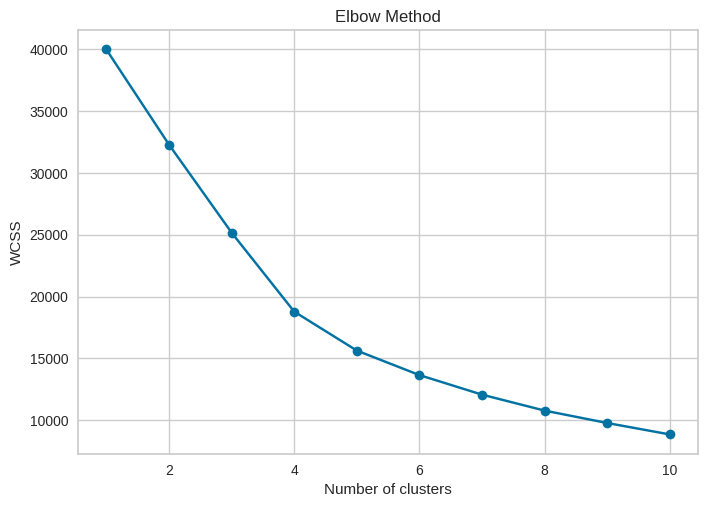

In [ ]:
plt.plot(range(1,11), wccs, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fit KMeans with the optimal number of clusters
optimal_clusters = 5  # Change this to the number of clusters determined by the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=0, max_iter=300)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters

In [ ]:
segment_means = data.groupby('Cluster')[selected_features].mean()
print(segment_means)

                Sales  Quantity  Discount       Profit
Cluster                                               
0          154.386846  3.839423  0.668894  -108.340384
1          259.658087  6.502890  0.096640    37.118737
2         2574.201483  6.320197  0.070690   621.195018
3          133.562814  2.548812  0.097561    22.202436
4        11938.584800  5.700000  0.070000  4018.913910


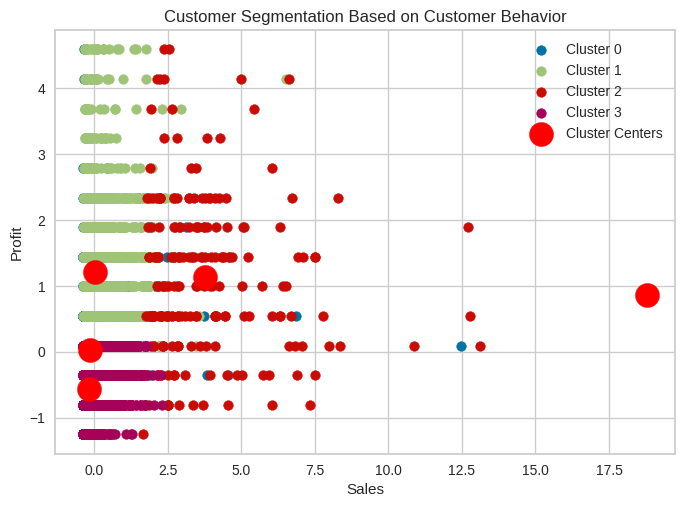

In [ ]:
for cluster_label in range(4):
    plt.scatter(scaled_data[kmeans.labels_ == cluster_label, 0],
                scaled_data[kmeans.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')

plt.legend()

plt.title('Customer Segmentation Based on Customer Behavior')
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.show()

In [ ]:
cluster_assignments = kmeans.labels_
for i in range(4):
    print(f"Number of data points in Cluster {i}: {sum(cluster_assignments == i)}")

Number of data points in Cluster 0: 1040
Number of data points in Cluster 1: 2595
Number of data points in Cluster 2: 203
Number of data points in Cluster 3: 6146
